In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files 
uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

In [1]:
#!ls "/content/gdrive/My Drive/"



import numpy as np
import pandas as pd
import io 
from scipy import stats
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, roc_auc_score



In [6]:

#Ici, nous chargeons les données CSV collectées à partir du script Python dans le dataframe pandas
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
video_df = pd.read_csv('video_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, video_df, dns_df, telnet_df], ignore_index=True)
df = pd.concat([ping_df, voice_df, video_df, dns_df, telnet_df], ignore_index=True)
pd.set_option('max_rows', 15)
df = pd.DataFrame(load_wine()['data'], columns=load_wine()['feature_names']); df

print(df)


NameError: name 'load_wine' is not defined

In [31]:
#Voir si les variables sont corrélées
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation
print(corr_matrix)

#La matrice de corrélation affichée permettra de voir les corrélations entre chaque paire de variables. 
#Les valeurs vont de -1 à 1, où -1 indique une corrélation négative parfaite, 
#0 indique l'absence de corrélation, et 1 indique une corrélation positive parfaite.

                                               Forward Instantaneous Packets per Second  \
Forward Instantaneous Packets per Second                                       1.000000   
Forward Average Packets per second                                            -0.007384   
Forward Instantaneous Bytes per Second                                         0.949704   
Forward Average Bytes per second                                              -0.009186   
DeltaReverse Instantaneous Packets per Second                                  0.727409   
Reverse Average Packets per second                                             0.000488   
Reverse Instantaneous Bytes per Second                                         0.725999   
Reverse Average Bytes per second                                               0.000450   

                                               Forward Average Packets per second  \
Forward Instantaneous Packets per Second                                -0.007384   
Forward Av

In [6]:
#Supprimez toutes les lignes qui contiennent NaN 
#(cela se produit lorsque le script d'apprentissage se termine brusquement).
df.dropna(inplace=True)


In [7]:
#Description des données: Nous avons maintenant 5242 lignes et 13 colonnes (12 caractéristiques, 1 cible).
print(df.shape)


(26241, 17)


In [8]:
# description statistique de nos données
df.describe()




,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,26241.000000,26241.000000,26241.000000,2.624100e+04,26241.000000,26241.000000,26241.000000,2.624100e+04
mean,13.802961,404.938735,1698.818757,5.145445e+04,6.925371,182.460116,464.891963,1.205222e+04
std,27.766115,3857.090243,3088.630211,4.940418e+05,24.998453,1755.821380,1648.181265,1.159019e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,72.659661,0.000000,9.122276e+03,0.000000,34.817385,0.000000,2.307033e+03
50%,0.500000,101.883593,49.000000,1.311122e+04,0.000000,44.565154,0.000000,2.946798e+03
75%,17.000000,187.541224,2211.000000,2.389909e+04,1.000000,78.163591,98.000000,5.171977e+03
max,213.000000,228550.000000,18744.000000,2.982014e+07,213.000000,92015.000000,14058.000000,6.075301e+06


In [9]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26241 entries, 0 to 26240
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Forward Packets                                26241 non-null  object 
 1   Forward Bytes                                  26241 non-null  object 
 2   Delta Forward Packets                          26241 non-null  object 
 3   Delta Forward Bytes                            26241 non-null  object 
 4   Forward Instantaneous Packets per Second       26241 non-null  float64
 5   Forward Average Packets per second             26241 non-null  float64
 6   Forward Instantaneous Bytes per Second         26241 non-null  float64
 7   Forward Average Bytes per second               26241 non-null  float64
 8   Reverse Packets                                26241 non-null  object 
 9   Reverse Bytes                                  262

In [10]:
#Le type de la colonne trafic est objet. Nous allons la convertir en catégorie afin 
#de pouvoir utiliser les fonctionnalités .cat (Fonctions spécifiques aux catégories).
df['Traffic Type'] = df['Traffic Type'].astype('category')


In [11]:

#Nous pouvons voir tous les types en utilisant .cat.categories :
df['Traffic Type'].cat.categories
#Nous pouvons également obtenir les données codées numériquement en utilisant les codes .cat.
df['Traffic Type'].cat.codes.head()


0    0
1    0
2    0
3    0
4    0
dtype: int8

In [12]:
#Les caractéristiques suivantes seront utilisées dans le modèle
print('Features:',df.columns[:-1].values)

Features: ['Forward Packets' 'Forward Bytes' 'Delta Forward Packets'
 'Delta Forward Bytes' 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Reverse Packets' 'Reverse Bytes'
 'Delta Reverse Packets' 'Delta Reverse Bytes'
 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [13]:

#voici le nombre de flux de chaque type de trafic
print('value counts:')
df['Traffic Type'].value_counts()

value counts:


telnet    6749
video     6704
ping      6551
voice     6237
Name: Traffic Type, dtype: int64

In [14]:
#Nous allons maintenant entraîner un modèle de régression logistique sur cet ensemble de données 
#en le divisant en un ensemble d'entraînement et un ensemble de test.
#Tout d'abord, nous divisons l'ensemble de données en caractéristiques et en cibles.
X= df.drop('Traffic Type', axis=1)
y = df['Traffic Type']


In [15]:
from sklearn import preprocessing

#x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [16]:
#Nous Créons des ensembles de formation et de test
# Nous allons utiliser train_test_split avec une taille de test de 0,3 pour placer 70 % de 
#nos données dans l'entraînement et 30 % dans le test. 
#Le paramètre random_state est défini pour que les résultats soient reproductibles.

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

In [17]:

#Entraînement du modèle:Nous allons maintenant créer et entraîner le modèle.
model = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs', 
                           class_weight='balanced', random_state=10)

In [18]:
model.fit(X_train,y_train)

/home/bessala/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=10)

In [19]:

#on Fait des prédictions: Prédiction unique
#idx=2590 #On fixe un nombre aléatoire
idx=2590
single_X_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

In [20]:
single_prediction = model.predict(single_X_test)
print('Dans cet exemple, notre modèle a prédit %s et a été actualisé en  %s' %(single_prediction[0],single_y_test))


Dans cet exemple, notre modèle a prédit ping et a été actualisé en  ping


In [21]:
#Entire test set
predictions = model.predict(X_test)


In [22]:
#Nous pouvons créer un dataframe pour voir nos données prédicte sous forme de tableau :
resultatsDF = pd.DataFrame({
                'true':y_test,
                'predicted':predictions
})
resultatsDF.head()


,true,predicted
21560,telnet,telnet
3719,ping,ping
24320,telnet,telnet
10180,voice,voice
22391,telnet,telnet


In [23]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions)*100))
#print(f'Area Under Curve: {roc_auc_score(y_test, predictions)}') # 0.5
#print(f'Recall score: {recall_score(y_test,predictions)}')

Accuracy: 89.62%


In [24]:
#Nous pouvons sauvegarder le modèle en utilisant la bibliothèque pickle pour l'utiliser plus tard en temps réel.
print(pickle.format_version)


4.0


In [25]:
pickle.dump(model,open('LogisticRegression', 'wb'))


In [26]:
#La matrice de confusion nous permet de voir la répartition numérique des prédictions par classe
cm = confusion_matrix(y_test, predictions, labels=y.cat.categories)
print(cm)


[[1692    0  274    0]
 [   0 2015    0   10]
 [  20    0 1991    0]
 [   0   11  502 1358]]


In [27]:
#
cmDF = pd.DataFrame()
for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories):
        temp[col] = cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp},orient='index'))
print(cmDF)

        ping  telnet  video  voice
ping    1692       0    274      0
telnet     0    2015      0     10
video     20       0   1991      0
voice      0      11    502   1358


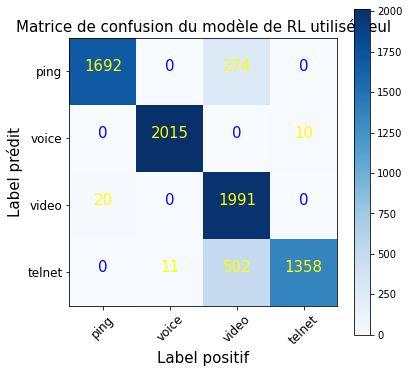

In [28]:
#nous allons ajouter une représentation graphique de données pour mieux visualiser
plt.figure(figsize=(6,6))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion du modèle de RL utilisé seul',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color= 'blue'
        if cm[i][j] > 5:
            color = 'yellow'
        plt.text(j,i, format(cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                ) 

In [29]:
from sklearn.model_selection import GridSearchCV

# define hyperparameters
w = [{0:1000, 1:100, 2:10, 3:10, 4:10},{0:1000, 1:100, 2:10, 3:10, 4:5}, 
#     {0:100, 1:50, 2:10, 3:10, 4:10}, {0:100, 1:100, 2:50, 3:50, 4:25}, 
#     {0:100, 1:100, 2:10, 3:10, 4:10}, {0:10, 1:4, 2:2, 3:2, 4:1}, 
#     {0:1, 1:2, 2:2, 3:4, 4:10}, {0:10, 1:10, 2:10, 3:100, 4:100}, 
     {0:25, 1:50, 2:50, 3:100, 4:100}, {0:10, 1:10, 2:10, 3:50, 4:100}, 
     {0:5, 1:10, 2:10, 3:100, 4:1000}, {0:10, 1:10, 2:10, 3:100, 4:1000}]
#crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   #,"penalty": ["l1", "l2"]
#                   ,"C": crange
#                   ,"solver": ["newton-cg", "lbfgs", "saga"]
                   ,"fit_intercept": [True, False]  }

# logistic model classifier
lg4 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg4, hyperparam_grid, scoring="roc_auc", cv=10, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')



/home/bessala/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


TypeError: '<' not supported between instances of 'str' and 'int'

In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score , confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.pipeline import Pipeline


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression(max_iter=200)))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(max_iter=200)
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores


In [30]:

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.918 (0.002)
>knn 0.998 (0.000)
>cart 1.000 (0.000)
>bayes 0.987 (0.001)
>stacking 1.000 (0.000)


In [31]:
#Nous pouvons sauvegarder le modèle en utilisant la bibliothèque pickle pour l'utiliser plus tard en temps réel.
print(pickle.format_version)

4.0


In [32]:
pickle.dump(model,open('stacking', 'wb'))

In [33]:
models = get_stacking()
models.fit(X_train, y_train)
pred_test = models.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
# Create Decision Tree classifer object
clf2 = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
conf_matrix = confusion_matrix(y_test , y_pred2)
print('\n\nconf_matrix:')
print(conf_matrix)


Accuracy: 0.9990207279255753


conf_matrix:
[[3850    0    0    2    0]
 [   2 3830    0    5    0]
 [   1    0 3715    0    0]
 [   4    3    0 3184    0]
 [   1    0    0    0 3784]]


In [39]:
#Nous pouvons sauvegarder le modèle en utilisant la bibliothèque pickle pour l'utiliser plus tard en temps réel.
print(pickle.format_version)

4.0


In [40]:
pickle.dump(model,open('RandomForestClassifier', 'wb'))

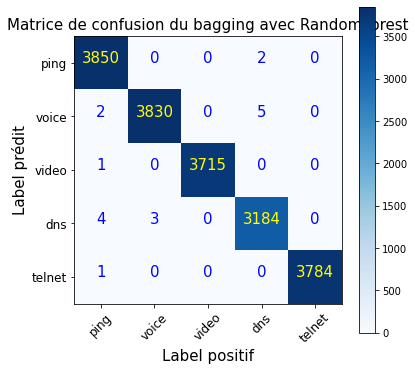

In [41]:
#nous allons ajouter une représentation graphique de données pour mieux visualiser
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion du bagging avec RandomForest',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        color= 'blue'
        if conf_matrix[i][j] > 5:
            color = 'yellow'
        plt.text(j,i, format(conf_matrix[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )    


In [42]:
#ACP ou analyse en composantes principales
df.drop('Traffic Type',axis=1).values[0:5]

array([[  1.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  1.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  98.,   1.,
         98.,   0.,   0.,   0.,   0.],
       [  1.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  98.,   1.,
         98.,   0.,   0.,   0.,   0.],
       [  2., 196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  1.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  98.,   1.,
         98.,   0.,   0.,   0.,   0.]])

In [43]:
#On peut donc avoir les moyennes/std par caractéristique.
df.drop('Traffic Type', axis=1).values.mean(axis=0)


array([6.32390780e+03, 7.03730123e+05, 3.25849152e+00, 4.10953956e+02,
       2.84221015e+00, 1.65048188e+01, 3.64208312e+02, 1.65393650e+03,
       6.32277432e+03, 7.03592933e+05, 4.63992035e+00, 5.16553512e+02,
       2.86730618e+00, 1.65089129e+01, 3.64094617e+02, 1.65672671e+03])

In [44]:
#ici on adapte le curseur ou scaler
#StandardScaler normalise une caractéristique en soustrayant la moyenne puis en la mettant 
#à l'échelle de la variance unitaire. 
#La variance unitaire signifie diviser toutes les valeurs par l'écart type
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type', axis=1))

StandardScaler()

In [45]:
scaled_data = scaler.transform(df.drop('Traffic Type', axis=1))
scaled_data[0:5]
#Voici les nouvelles moyennes et l'écart-type par caractéristique.


array([[-0.65144287, -0.52387689, -0.26105813, -0.24368531, -0.25533586,
        -0.11220047, -0.23175609, -0.1257053 , -0.65147351, -0.52389219,
        -0.04027055, -0.05643567, -0.25595032, -0.11219955, -0.25352094,
        -0.12559102],
       [-0.65144287, -0.52387689, -0.26105813, -0.24368531, -0.25533586,
        -0.11220047, -0.23175609, -0.1257053 , -0.65137047, -0.52381922,
        -0.0315914 , -0.04572875, -0.25595032, -0.11219955, -0.25352094,
        -0.12559102],
       [-0.65144287, -0.52387689, -0.26105813, -0.24368531, -0.25533586,
        -0.11220047, -0.23175609, -0.1257053 , -0.65137047, -0.52381922,
        -0.0315914 , -0.04572875, -0.25595032, -0.11219955, -0.25352094,
        -0.12559102],
       [-0.65133984, -0.52380392, -0.26105813, -0.24368531, -0.25533586,
        -0.11220047, -0.23175609, -0.1257053 , -0.65147351, -0.52389219,
        -0.04027055, -0.05643567, -0.25595032, -0.11219955, -0.25352094,
        -0.12559102],
       [-0.65144287, -0.52387689, -0

In [46]:
#Voici les nouvelles moyennes et l'écart-type par caractéristique
scaled_data.mean(axis=0)


array([-5.19567052e-17,  6.49458815e-18, -1.67003695e-17, -4.82455120e-17,
       -8.72130408e-17, -2.04115627e-17,  6.12346882e-17, -1.67003695e-17,
        5.19567052e-17,  2.78339492e-17, -6.95848730e-18,  1.43808738e-17,
       -3.15451424e-17,  1.71642687e-17,  2.22671594e-17, -2.22671594e-17])

In [47]:
#Maintenant nous allons ajuster le modèle PCA aux données, nous allons spécifier n_composants=2 
#parce que nous voulons seulement les 2 premières composantes principales.
pca = PCA(n_components=2)
pca.fit(scaled_data)


PCA(n_components=2)

In [48]:

scaled_data.shape

(61267, 16)

In [49]:
X_pca = pca.transform(scaled_data)

In [50]:
X_pca.shape


(61267, 2)

In [51]:
#exprimons les variances 
pca.explained_variance_ratio_

array([0.28119273, 0.2130091 ])

In [52]:
pca.explained_variance_ratio_.sum()*100


49.42018389271065

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


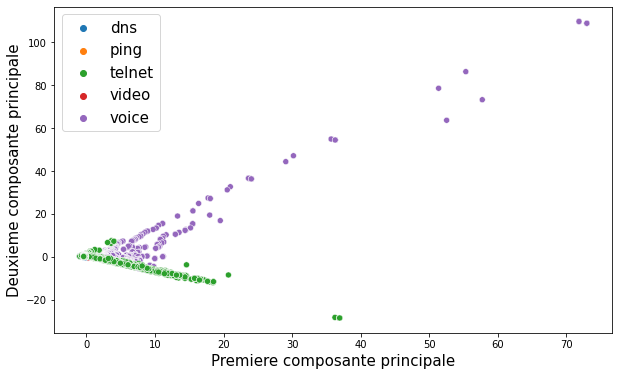

In [53]:
#On peut voir ci-dessus que nos deux premières composantes principales expliquent 84,16 % de 
#la variance de nos données. Nous pouvons obtenir une variance expliquée plus élevée en augmentant 
#le nombre de composantes principales jusqu'à un maximum de 100% avec n_composantes = n_caractéristiques.

#Traçons les composantes principales
fig = plt.figure(figsize=(10,6))
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = df['Traffic Type'])
plt.xlabel('Premiere composante principale', fontsize=15)
plt.ylabel('Deuxieme composante principale', fontsize=15)
plt.legend(fontsize=15)


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X_pca ,y.cat.codes, test_size=0.3, random_state=101)

In [55]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [56]:
#Comme nous l'avons vu plus haut, la valeur de la précision est plus faible lorsque 
#nous n'utilisons que les deux premières composantes principales, par opposition à l'ensemble des caractéristiques. 
#ceci n'est qu'à des fins de visualisation.
predictions=model.predict(X_test)
print('Accuracy:%.2f%%' %(accuracy_score(predictions,y_test)*100))

Accuracy:99.45%


In [57]:
#Nous allons d'abord générer une grille de valeurs x[0] et x[1] 
#que nous utiliserons pour faire des prédictions 
X_min=X_pca[:,0].min()
X_max=X_pca[:,0].max()
y_min=X_pca[:,1].min()
y_max=X_pca[:,1].max()
spacing = 0.01


In [58]:
#XX,yy =np.meshgrid(np.arange(X_min,X_max,spacing),np.arange(y_min,y_max,spacing))


In [59]:
#Nous allons remodeler les prédictions Z en tableau 2D pour les tracer.
#Z= model.predict(np.c_[XX.ravel(), yy.ravel()])
#Z = Z.reshape(XX.shape)


In [ ]:
#Maintenant, nous allons tracer les données et les limites de décision.
#plt.figure(figsize=(10,6))
#plt.contourf(XX,yy, Z,cmap=plt.cm.Spectral)
#sns.scatterplot(X_pca[:,0],X_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
#plt.title('Decision Boundaries', fontsize=15)
#plt.Xlabel('Premiere composante principale', fontsize=15)
#plt.ylabel('Deuxieme composante principale', fontsize=15)
#plt.tight_layout()
#plt.Xlim([X_min,X_max])
#plt.ylim([y_min,y_max])
#plt.legend(fontsize=15)

NameError: ignored

In [60]:

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [61]:
# define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy=0.8)


Class=1, n=12839 (20.000%)
Class=4, n=12839 (20.000%)
Class=3, n=12839 (20.000%)
Class=0, n=12839 (20.000%)
Class=2, n=12839 (20.000%)


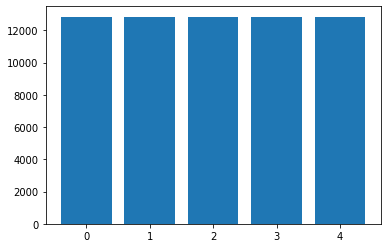

In [62]:
#Si dans le jeu de trafic les classes sont deséquilibrés on peut faire un sous-échantillonage pour mettre les classes de trafic 
#dans le meme ordre de distribution
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [63]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)


In [66]:
# Create Decision Tree classifer object
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state = 42)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
conf_matrix= confusion_matrix(y_test , y_pred3)
print('\n\nconf_matrix:')
print(conf_matrix)

Accuracy: 0.9998961524482061


conf_matrix:
[[3851    0    0    0    0]
 [   0 3852    0    0    0]
 [   0    0 3852    0    0]
 [   0    0    0 3852    0]
 [   0    0    2    0 3850]]


AttributeError: ignored

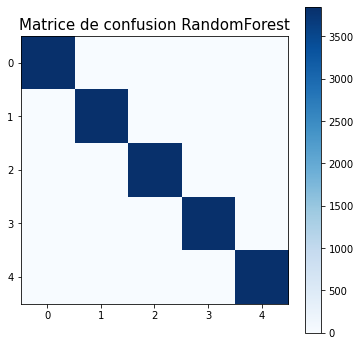

In [67]:
#nous allons ajouter une représentation graphique de données pour mieux visualiser
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion RandomForest',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        color= 'blue'
        if conf_matrix[i][j] > 5:
            color = 'yellow'
        plt.text(j,i, format(conf_matrix[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )   
 

In [68]:
from xgboost import XGBClassifier

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

xgboost = XGBClassifier(n_estimators = 100, learning_rate = 0.1)
xgboost.fit(X_train, y_train, early_stopping_rounds = 5,
           eval_set = [(X_val, y_val)], verbose = 1)
score_xgb = xgboost.score(X_test, y_test)

[0]	validation_0-merror:0.00319
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.002967
[2]	validation_0-merror:0.00267
[3]	validation_0-merror:0.002225
[4]	validation_0-merror:0.002077
[5]	validation_0-merror:0.001929
[6]	validation_0-merror:0.001854
[7]	validation_0-merror:0.002003
[8]	validation_0-merror:0.002003
[9]	validation_0-merror:0.002003
[10]	validation_0-merror:0.002003
[11]	validation_0-merror:0.002003
Stopping. Best iteration:
[6]	validation_0-merror:0.001854



In [69]:
ypred = xgboost.predict(X_test)

In [70]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
conf_matrix = confusion_matrix(y_test, ypred)
print('\n\nconf_matrix:')
print(conf_matrix)
#print(score_xgb)

Accuracy: 0.9987019056025754


conf_matrix:
[[3851    0    0    0    0]
 [   2 3844    0    6    0]
 [   1    0 3851    0    0]
 [  10    4    0 3838    0]
 [   2    0    0    0 3850]]


In [71]:
m2_xgb = XGBClassifier(n_estimators=110, nthread=-1, max_depth = 5, seed=1729)
m2_xgb.fit(X_train, y_train, eval_metric="auc", verbose = 1, eval_set=[(X_val, y_val)])

XGBoostError: ignored

In [ ]:
ypred = m2_xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
conf_matrix = confusion_matrix(y_test , ypred)
print('\n\nconf_matrix:')
print(conf_matrix)

XGBoostError: ignored

In [ ]:
#nous allons ajouter une représentation graphique de données pour mieux visualiser
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix,interpolation='nearest',cmap=plt.conf_matrix.Blues)
plt.title('Matrice de confusion Avec XGBClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        color= 'blue'
        if conf_matrix[i][j] > 5:
            color = 'white'
        plt.text(j,i, format(conf_matrix[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                ) 